In [1]:
%load_ext autoreload
import sys
sys.path.append("..")
import imcurio.visicalc as vc

In [2]:
v,x,y = vc.rfft2_real_coords(128,0.1)
rmap=np.zeros((128,128),float)
rmap[4,2]=1

In [3]:
%autoreload
V=vc.VisiCalc(rmap,0.1,vc.SimplestGaussBeam(2))
u=np.linspace(-V.df*10.1,V.df*5.1,100)
v=np.linspace(-V.df*15.1,V.df*35.1,100)

In [4]:
vis=V.visibility(u,v,linear_interpolation=True)
vis2=V.visibility(u,v,linear_interpolation=False)

/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


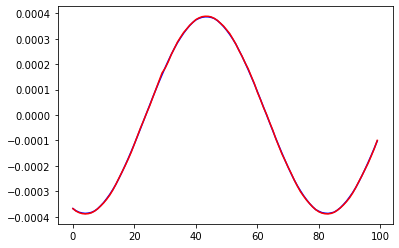

In [5]:
plt.plot(np.arange(100),vis,'b-')
plt.plot(np.arange(100),vis2,'r-')